In [190]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Data Cleansing

In [192]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [193]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [194]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [195]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [196]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Set các giá trị NaN thành 0

In [197]:
print(df.columns.difference([df.columns[-1]], sort=False)) 

for x in df.columns.difference([df.columns[-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
    df[x] = df[x].fillna(0)

df[df.columns[-1]] = df[df.columns[-1]].fillna(0)
df = df.drop([df.columns[i] for i in range(0,2)], axis=1)
print(df)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
       PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0       0.00   0.00   0.92  18.22  17.15   0.00   0.92  27.64  133.36   
1       0.00   0.00   0.97  15.69  16.46   0.00   0.97  24.55   34.06   
2       0.00   0.00  17.40  19.30  29.70   0.00  17.40  29.07   30.70   
3       0.00   0.00   1.70  18.48  17.97   0.00   1.70  18.59   36.08   
4       0.00   0.00  22.10  21.42  37.76   0.00  22.10  39.33   39.31   
...      ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
29529  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
29530  15.00  66.00   0.40  26.85  14.05  

# Thay các giá trị String của cột AQI_Bucket thành các giá trị One-Hot

In [198]:
# lastCol = df.columns[-1]
uniqueValuesOfAQI_Bucket = df[lastCol].unique()

# Loại bỏ tất cả các hàng có giá trị AQI_Bucket = 0
df = df[df.AQI_Bucket != 0]
print(uniqueValuesOfAQI_Bucket) 
 
categorical_vars = [lastCol]

# instantiate the one hot encoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop = "first")

encoder_vars_array = one_hot_encoder.fit_transform(df[categorical_vars])
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)
df_new = pd.concat([df.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
df_new.drop(categorical_vars, axis = 1, inplace = True) 
print(df_new)
encoder_vars_array

[0 'Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']
        PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0       83.13   0.00   6.93  28.71  33.72   0.00   6.93  49.52   59.76   
1       79.84   0.00  13.85  28.68  41.08   0.00  13.85  48.49   97.07   
2       94.52   0.00  24.39  32.66  52.61   0.00  24.39  67.39  111.33   
3      135.99   0.00  43.48  42.08  84.57   0.00  43.48  75.23  102.70   
4      178.33   0.00  54.56  35.31  72.80   0.00  54.56  55.04  107.38   
...       ...    ...    ...    ...    ...    ...    ...    ...     ...   
24845   15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
24846   24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
24847   22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
24848   16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
24849   15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   17.05   

       Benzene  Toluene  Xylene    AQI  AQI_Bu

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [199]:
target = [df_new.columns[i] for i in range(0,15)]
print(target)
features = [x for x in df_new.columns if x not in target]
print(features)

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket_Moderate', 'AQI_Bucket_Poor']
['AQI_Bucket_Satisfactory', 'AQI_Bucket_Severe', 'AQI_Bucket_Very Poor']


In [200]:
def var(x):
  s = 0
  for item in x:
    s+= (item-np.mean(x)) ** 2
  return s / (len(x)-1)

def cov(x, y):
  s = 0
  for i in range(0, len(x)):
    s+= (x[i] -np.mean(x)) * (y[i]-np.mean(y))
  return s / (len(x)-1)


def cor(x, y):
  return cov(x,y) / np.sqrt(var(x) * var(y))

In [201]:
df_new.isna().sum()

PM2.5                      0
PM10                       0
NO                         0
NO2                        0
NOx                        0
NH3                        0
CO                         0
SO2                        0
O3                         0
Benzene                    0
Toluene                    0
Xylene                     0
AQI                        0
AQI_Bucket_Moderate        0
AQI_Bucket_Poor            0
AQI_Bucket_Satisfactory    0
AQI_Bucket_Severe          0
AQI_Bucket_Very Poor       0
dtype: int64

In [202]:
corr_matrix = df_new.corr() 
print(corr_matrix)

                            PM2.5      PM10        NO       NO2       NOx  \
PM2.5                    1.000000  0.299124  0.461326  0.378036  0.397965   
PM10                     0.299124  1.000000  0.388250  0.269632  0.399838   
NO                       0.461326  0.388250  1.000000  0.476802  0.783144   
NO2                      0.378036  0.269632  0.476802  1.000000  0.628429   
NOx                      0.397965  0.399838  0.783144  0.628429  1.000000   
NH3                      0.091082  0.170997  0.123503  0.098912  0.133767   
CO                       0.097747 -0.082063  0.220152  0.371969  0.252455   
SO2                      0.115202  0.089229  0.187031  0.415788  0.222888   
O3                       0.178952  0.184771  0.022720  0.288657  0.115939   
Benzene                  0.029860  0.027797  0.047977  0.046792  0.065380   
Toluene                  0.138683  0.078614  0.152252  0.308936  0.206426   
Xylene                   0.082538 -0.016298  0.081804  0.197254  0.101695   

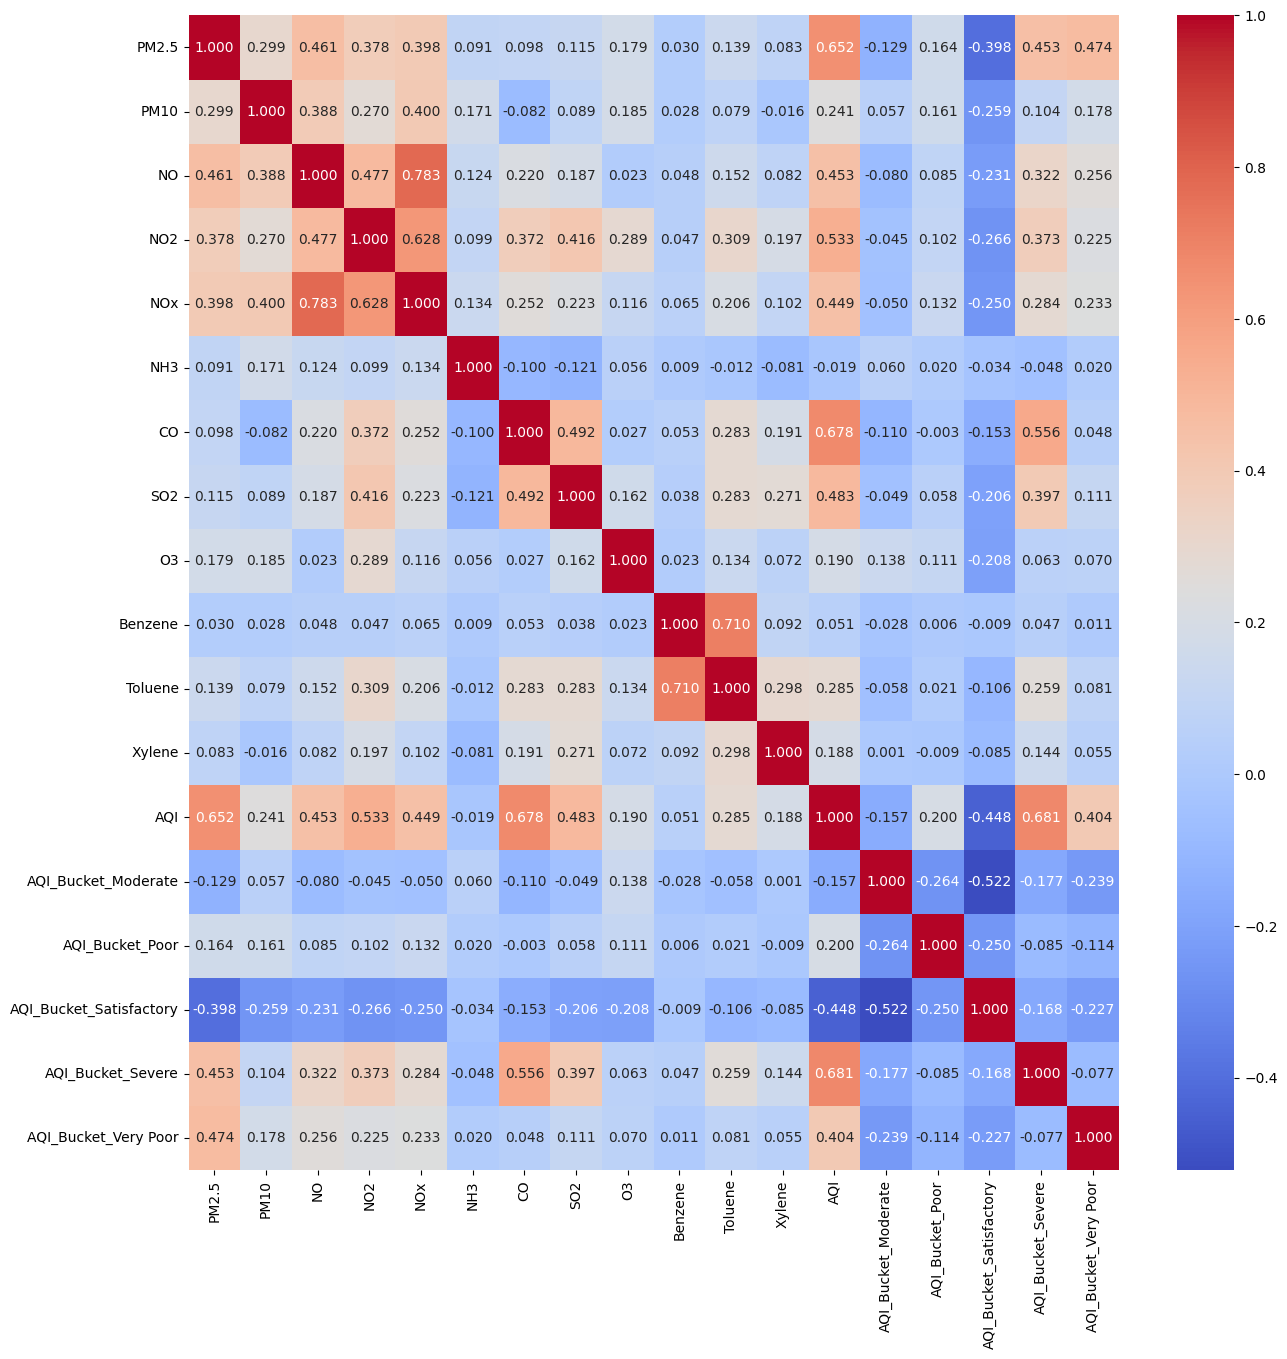

In [203]:
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df_new.columns, yticklabels=df_new.columns)
figure= plt.gcf()
figure.set_size_inches(15,15)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [204]:
corr_matrix.unstack().sort_values().drop_duplicates()

AQI_Bucket_Moderate      AQI_Bucket_Satisfactory   -0.522106
AQI                      AQI_Bucket_Satisfactory   -0.448389
AQI_Bucket_Satisfactory  PM2.5                     -0.398195
NO2                      AQI_Bucket_Satisfactory   -0.266410
AQI_Bucket_Poor          AQI_Bucket_Moderate       -0.263524
                                                      ...   
CO                       AQI                        0.677645
AQI                      AQI_Bucket_Severe          0.680629
Benzene                  Toluene                    0.709668
NO                       NOx                        0.783144
PM2.5                    PM2.5                      1.000000
Length: 154, dtype: float64

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new[target], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17395, 3) (7455, 3) (17395, 15) (7455, 15)


In [206]:
len(df)
X_drop = df_new.drop([df_new.index[i] for i in range(10000, len(df))])
X_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PM2.5                    10000 non-null  float64
 1   PM10                     10000 non-null  float64
 2   NO                       10000 non-null  float64
 3   NO2                      10000 non-null  float64
 4   NOx                      10000 non-null  float64
 5   NH3                      10000 non-null  float64
 6   CO                       10000 non-null  float64
 7   SO2                      10000 non-null  float64
 8   O3                       10000 non-null  float64
 9   Benzene                  10000 non-null  float64
 10  Toluene                  10000 non-null  float64
 11  Xylene                   10000 non-null  float64
 12  AQI                      10000 non-null  float64
 13  AQI_Bucket_Moderate      10000 non-null  float64
 14  AQI_Bucket_Poor        

In [207]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop[features].values, X_drop[target].values, test_size=0.3, random_state=42)
print(X_train_drop.shape,X_test_drop.shape,y_train_drop.shape,y_test_drop.shape)

(7000, 3) (3000, 3) (7000, 15) (3000, 15)


In [208]:
def BuildConfusionMatrix(y_test,pred):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  for i in range(len(y_test)):
    if (y_test[i]==pred[i]):
        if pred[i] == 1:
              TP += 1
        else:
              TN += 1
    else:
        if pred[i]==1:
            FP += 1
        else:
            FN += 1
  return [TN,FP,FN,TP]

Sklearn

KNN - Phùng Đức Cường (B19DCCN090)

In [209]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop[features], X_drop[target], test_size=0.3, random_state=42)
print(X_train_drop.shape,X_test_drop.shape,y_train_drop.shape,y_test_drop.shape)

(7000, 3) (3000, 3) (7000, 15) (3000, 15)


In [210]:
import math

def euclide_distance(x1, x2):
  distance = 0.0
  for i in range(len(x1)):
    distance += (x1[i] - x2[i]) ** 2
  return math.sqrt(distance)

class KNNClassification:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self.do_predict(x) for x in X.values]
    return predictions

  def do_predict(self, x):
    # Tinh khoang cach euclide
    index = 0
    distances = list()
    for x_train in self.X_train.values:
      dist = euclide_distance(x, x_train)
      distances.append((index, dist))
      index += 1


    # Sap xep theo khoang cach euclide tang dan
    distances.sort(key=lambda x: x[1])

    # Lay ra K neighbors gan nhat
    index_neighbors = list()
        
    for i in range(self.k):
      index_neighbors.append(distances[i][0])

      # Lay ra labels cua K neighbors
       
    labels = list()
    count = 0
    for value in self.y_train.values:
      if count in index_neighbors:
        labels.append(value)
        index_neighbors.remove(count)
      count += 1
        
        # tim labels co so lan xuat hien nhieu nhat
    counter = 0
    output = labels[0]        
    for i in labels:
      curr_frequency = labels.count(i)
      if(curr_frequency> counter):
        counter = curr_frequency
        output = i
    
    return output


In [211]:
print(type (X_test_drop))

<class 'pandas.core.frame.DataFrame'>


In [212]:
ks = [k for k in range(5, 15)]
for i in ks:
  model = KNNClassification(i)
  model.fit(X_train_drop, y_train_drop)
  print(model.fit(X_train_drop, y_train_drop))
  rs = model.predict(X_test_drop)
  P = BuildConfusionMatrix(y_test_drop.values,rs)
  TN=P[0]
  FP=P[1]
  FN=P[2]
  TP=P[3]
  print(f"Accuracy for k= {i}: {round((TP+TN)/(TP+TN+FP+FN), 2) * 100}%")

None


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
k = 13
model = KNNClassification(k)
model.fit(X_train_drop, y_train_drop)
rs = model.predict(X_test_drop)